# Animal Image Classification using CNN


This notebook demonstrates how to build a Convolutional Neural Network (CNN) to classify animal images. The dataset, containing 10 animal categories, is sourced from Kaggle (Animals10 dataset).

The dataset consist of about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.


### Objectives:
- Download data from Kaggle
- Preprocess and prepare image data
- Build and train a CNN model using TensorFlow/Keras
- Evaluate and visualize performance
- Analyze misclassified samples

This serves as a complete image classification pipeline using deep learning.


In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [50]:
#!pip install torch torchvision


Download the DataSet from Kaggle.

In [51]:
!kaggle datasets download -d alessiocorrado99/animals10 -p ./raw-img --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [52]:
dataset_name = 'alessiocorrado99/animals10'
zip_name = dataset_name.split('/')[-1]
!kaggle datasets download -d {dataset_name}
!unzip -q ./{zip_name} -d ~/Dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open ./animals10, ./animals10.zip or ./animals10.ZIP.


Importing the DataSet and performing first transformation steps.

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [54]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder("/kaggle/input/animals10", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [55]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = ImageFolder('/kaggle/input/animals10/raw-img', transform=transform)

In [56]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [57]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

Plotting the Data we are working with.

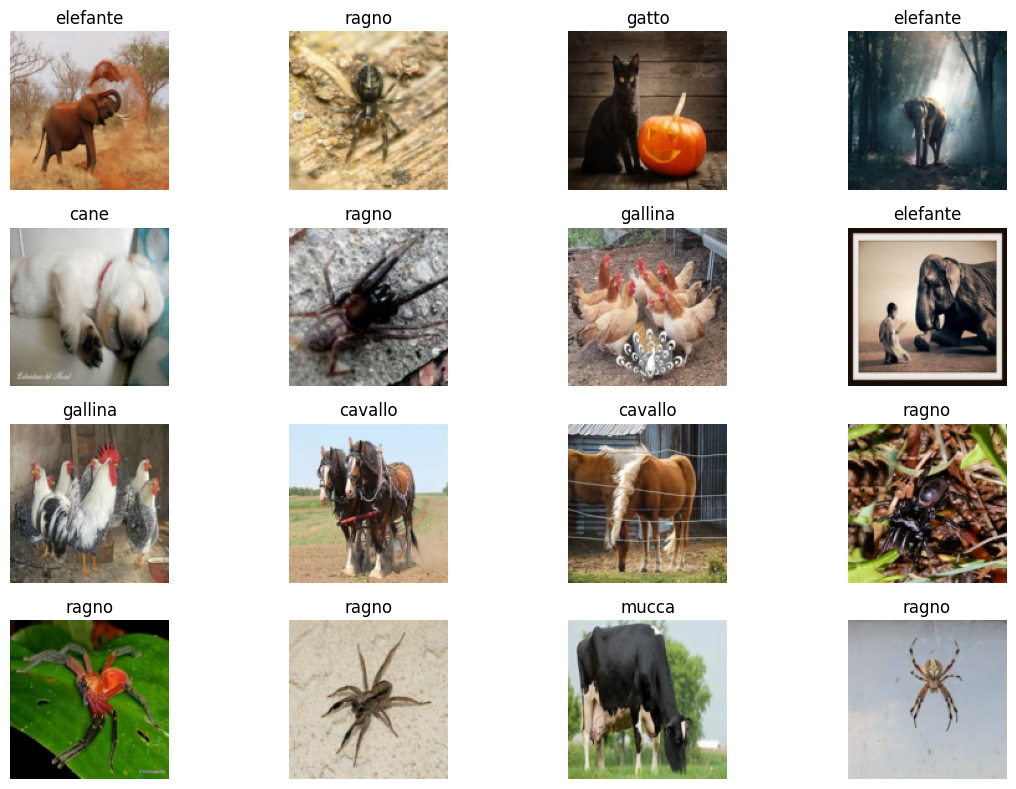

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Get class names
class_names = dataset.classes

# Create a DataLoader (just for visualization)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Get one batch
images, labels = next(iter(data_loader))

# Convert tensors to NumPy and plot
plt.figure(figsize=(12, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].permute(1, 2, 0).numpy()  # CxHxW → HxWxC
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [59]:
import os

class_map = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"
}

# After loading dataset
class_names = [class_map.get(cls, cls) for cls in dataset.classes]
print(class_names)

['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'ragno', 'squirrel']


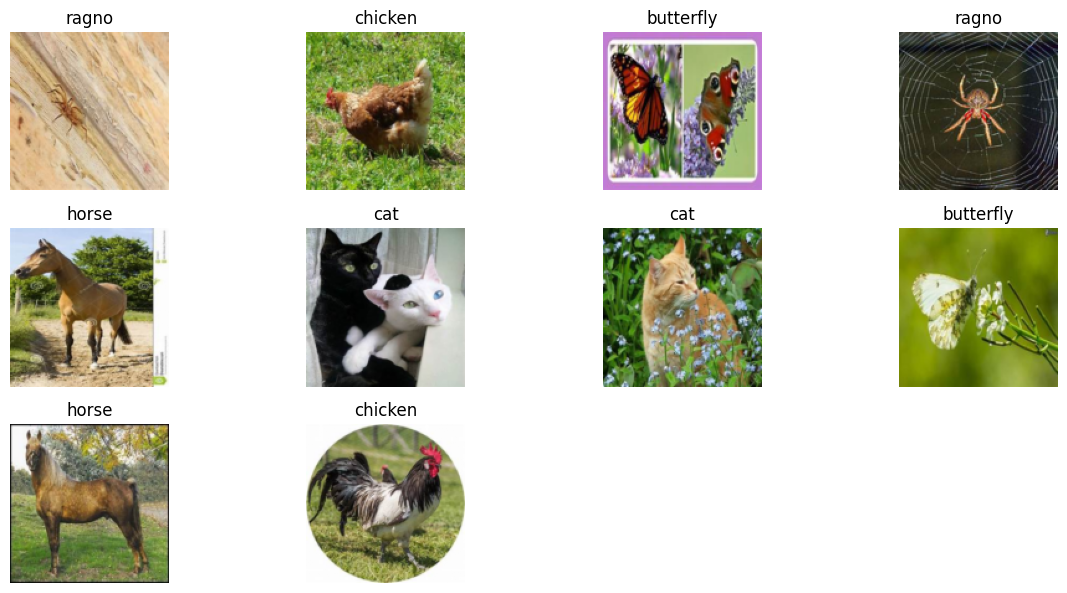

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Translation dictionary: Italian → English
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"
}

# Get class names and map to English
class_names = [translate.get(name, name) for name in dataset.classes]

dataset.classes = class_names
# Create a DataLoader (just for visualization)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Get one batch
images, labels = next(iter(data_loader))

# Plot images with English class names
plt.figure(figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


Splitting and categorising the Data.

In [61]:
from torch.utils.data import random_split

# 80% train, 20% test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

In [62]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

In [63]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

Checkpoint

In [64]:


#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

#print(y_train.shape)
#print(y_test.shape)




Creating the First Model.

In [65]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.backend import clear_session

# Force TensorFlow to use CPU only
# This often resolves GPU initialization issues
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Or alternatively, limit GPU memory growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

# Clear any previous Keras session
clear_session()
tf.keras.backend.clear_session()

# Set your dataset path
dataset_path = "/kaggle/input/animals10/raw-img"

# Image parameters
img_size = (28, 28)
batch_size = 128

# Load dataset from folders
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=None,
    shuffle=True
)

# Convert to NumPy arrays
x = []
y = []
for img, label in dataset:
    x.append(img.numpy())
    y.append(label.numpy())

x = np.array(x)
y = np.array(y)
print("x shape:", x.shape)
print("y shape:", y.shape)

# Normalize pixel values
x = x / 255.0

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
print("One-hot train label shape:", y_train_onehot.shape)
print("One-hot test label shape:", y_test_onehot.shape)


Found 26179 files belonging to 10 classes.
x shape: (26179, 28, 28, 3)
y shape: (26179,)
Train: (20943, 28, 28, 3) (20943,)
Test: (5236, 28, 28, 3) (5236,)
One-hot train label shape: (20943, 10)
One-hot test label shape: (5236, 10)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential([
    #Layer 1
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    #Layer 2
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),



    Flatten(),
    Dense(64, activation='relu'),  # Reduced from 128
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model, changed optimizer to adam
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Print model summary
model.summary()

history = model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test_onehot),
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,930 (1.08 MB)

 Trainable params: 281,546 (1.07 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.2279 - loss: 2.2943 - val_accuracy: 0.3608 - val_loss: 1.8320
Epoch 2/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3435 - loss: 1.9050 - val_accuracy: 0.3980 - val_loss: 1.7526
Epoch 3/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3755 - loss: 1.7927 - val_accuracy: 0.4347 - val_loss: 1.6221
Epoch 4/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.4219 - loss: 1.6620 - val_accuracy: 0.4796 - val_loss: 1.5369
Epoch 5/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4526 - loss: 1.5722 - val_accuracy: 0.4511 - val_loss: 1.5652
Epoch 6/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4819 - loss: 1.4964 - val_accuracy: 0.5214 - val_loss: 1.3894
Epoch 7/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5167 - loss: 1.4131 - val_accuracy: 0.5537 - val_loss: 1.3605
Epoch 8/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5418 - loss: 1.3264 - 

In [67]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


<-decreasing the layers increases the overfitting.

After trial and error figuring our that a 3 Layer Model with 32Filters at first, then doubling the count will create best accuracy scores.

In [68]:
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential([
    #Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    #Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

     #Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model, changed optimizer to adam
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Print model summary
model.summary()

history = model.fit(
    x_train, y_train_onehot,
    epochs=25,
    batch_size=128,
    validation_data=(x_test, y_test_onehot),
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,018 (949.29 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.2812 - loss: 2.3894 - val_accuracy: 0.1875 - val_loss: 2.4201
Epoch 2/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.4510 - loss: 1.6133 - val_accuracy: 0.2445 - val_loss: 2.4502
Epoch 3/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5244 - loss: 1.3936 - val_accuracy: 0.3953 - val_loss: 1.8270
Epoch 4/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.5695 - loss: 1.2409 - val_accuracy: 0.4899 - val_loss: 1.5298
Epoch 5/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6113 - loss: 1.1343 - val_accuracy: 0.5621 - val_loss: 1.3016
Epoch 6/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.6453 - loss: 1.0271 - val_accuracy: 0.5796 - val_loss: 1.2478
Epoch 7/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6718 - loss: 0.9389 - val_accuracy: 0.4574 - val_loss: 1.8361
Epoch 8/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7104 - loss: 0.8359 - val_acc

<- increassing the layer increases the accuracy yet also extend of overfitting.

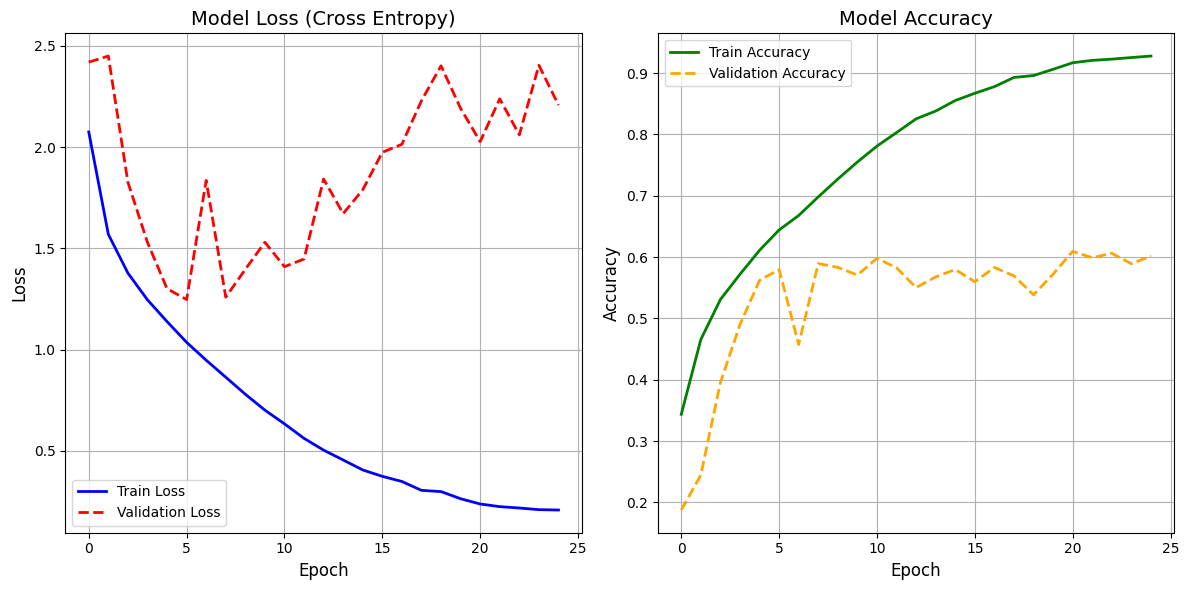

In [69]:
import matplotlib.pyplot as plt

# Set figure size and layout
plt.figure(figsize=(12, 6))

# --- Loss plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Model Loss (Cross Entropy)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# --- Accuracy plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Final layout
plt.tight_layout()
plt.show()

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


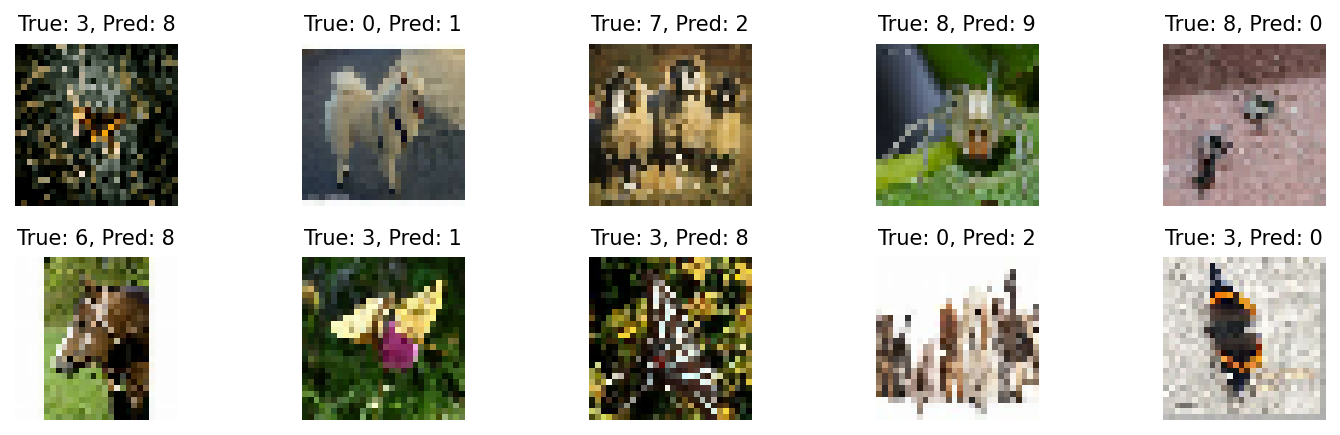

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Predict and identify misclassified samples
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Plot first 10 misclassified color images clearly
plt.figure(figsize=(10, 3), dpi=150)  # Higher DPI for sharpness

for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], interpolation='none')  # <– Critical: no blur
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()